# **Задание № 3**

решил использовать готовый пакет [SDV](https://docs.sdv.dev/sdv)

In [ ]:
pip install sdv

In [2]:
import pandas as pd
from sdv.metadata import SingleTableMetadata

from sdv.single_table import GaussianCopulaSynthesizer
from sdv.evaluation.single_table import run_diagnostic
from sdv.evaluation.single_table import evaluate_quality
from sdv.evaluation.single_table import get_column_plot

In [3]:
german_credit_df = pd.read_csv('/content/german_credit_data_target - german_credit_data_target.csv')
loans_df = pd.read_csv('/content/loans_full_schema - loans_full_schema.csv')

In [4]:
german_credit_df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
loans_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


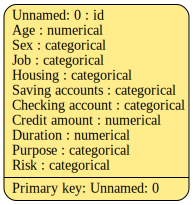

In [7]:
# Метаданные german_credit_df
german_credit_metadata = SingleTableMetadata()
german_credit_metadata.detect_from_dataframe(german_credit_df)
german_credit_metadata.visualize()

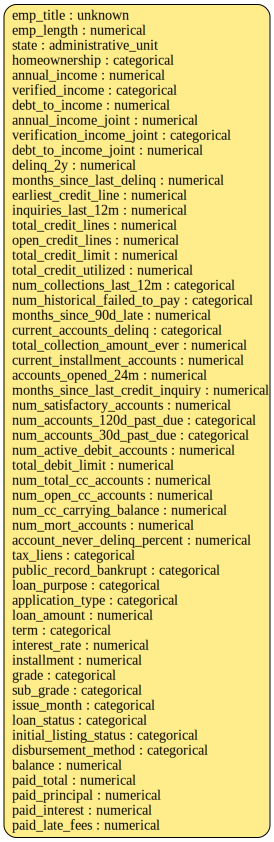

In [8]:
# Метаданные loans_df
loans_metadata = SingleTableMetadata()
loans_metadata.detect_from_dataframe(loans_df)
loans_metadata.visualize()

Для генерироции данных будем использовать классические статистические методы обучения модели и генерации синтетических данных *Gaussian Copula*



In [10]:
# Генерим данные для german_credit_df
german_credit_synthesizer = GaussianCopulaSynthesizer(german_credit_metadata)
german_credit_synthesizer.fit(german_credit_df)
german_synthetic_data = german_credit_synthesizer.sample(num_rows=len(german_credit_df) * 100)
print(len(german_synthetic_data))
german_synthetic_data.head()

100000


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,42,male,1,own,little,NaN,1621,9,car,good
1,1,57,male,3,own,NaN,moderate,2681,19,furniture/equipment,good
2,2,31,male,2,own,moderate,NaN,2611,39,business,good
3,3,42,male,1,own,quite rich,little,3637,28,business,good
4,4,21,female,2,rent,little,NaN,2403,20,radio/TV,good


In [11]:
# Генерим данные для loans_df
loans_synthesizer = GaussianCopulaSynthesizer(loans_metadata)
loans_synthesizer.fit(loans_df)
loans_synthetic_data = loans_synthesizer.sample(num_rows=len(loans_df) * 100)
print(len(loans_synthetic_data))
loans_synthetic_data.head()

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:81: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


1000000


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,sdv-pii-2qnox,10.0,Maryland,MORTGAGE,60938.815418,Not Verified,19.09,NaN,NaN,NaN,...,B3,Feb-2018,Current,whole,Cash,24296.01,2288.655529,1628.71,680.16,0.010048
1,sdv-pii-650un,10.0,West Virginia,MORTGAGE,114097.357207,Source Verified,3.83,NaN,NaN,NaN,...,B4,Jan-2018,Current,whole,DirectPay,19969.62,3137.959680,1769.43,1331.62,0.061694
2,NaN,5.0,Massachusetts,OWN,62673.170748,Verified,10.30,NaN,NaN,16.44,...,B5,Jan-2018,Current,whole,Cash,99.99,4940.796869,4489.71,309.98,0.181959
3,sdv-pii-dy7az,2.0,West Virginia,MORTGAGE,62123.269030,Source Verified,13.85,127783.37,NaN,NaN,...,B2,Mar-2018,Current,whole,Cash,1655.97,775.567168,705.86,55.81,0.051879
4,sdv-pii-gzbvv,10.0,Utah,RENT,87978.785963,Source Verified,2.20,NaN,NaN,NaN,...,B5,Mar-2018,Current,whole,Cash,59.88,1452.707471,1463.80,34.04,0.062633


Проверка достоверности данных для *german_synthetic_data*

In [14]:
diagnostic = run_diagnostic(
    real_data=german_credit_df,
    synthetic_data=german_synthetic_data,
    metadata=german_credit_metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 11/11 [00:00<00:00, 149.71it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 139.95it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



Проверка достоверности данных для *loans_synthetic_data*


In [15]:
diagnostic = run_diagnostic(
    real_data=loans_df,
    synthetic_data=loans_synthetic_data,
    metadata=loans_metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 55/55 [00:02<00:00, 26.80it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 164.90it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



Статистическое сходство между реальными и синтетическими данными для *german_credit_df*




In [16]:
quality_report = evaluate_quality(
    german_credit_df,
    german_synthetic_data,
    german_credit_metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 11/11 [00:00<00:00, 60.82it/s]|
Column Shapes Score: 97.67%

(2/2) Evaluating Column Pair Trends: |██████████| 55/55 [00:04<00:00, 13.44it/s]|
Column Pair Trends Score: 90.85%

Overall Score (Average): 94.26%



Статистическое сходство между реальными и синтетическими данными для *loans_df*

In [17]:
quality_report = evaluate_quality(
    loans_df,
    loans_synthetic_data,
    loans_metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 55/55 [00:07<00:00,  7.20it/s]|
Column Shapes Score: 88.1%

(2/2) Evaluating Column Pair Trends: |██████████| 1485/1485 [13:16<00:00,  1.86it/s]|
Column Pair Trends Score: 91.36%

Overall Score (Average): 89.73%



Сравнение синтетических данных и исходных данных полученных для *german_credit_df*

In [ ]:
fig = get_column_plot(
    real_data=german_credit_df,
    synthetic_data=german_synthetic_data,
    column_name='Credit amount',
    metadata=german_credit_metadata
)

fig.show()

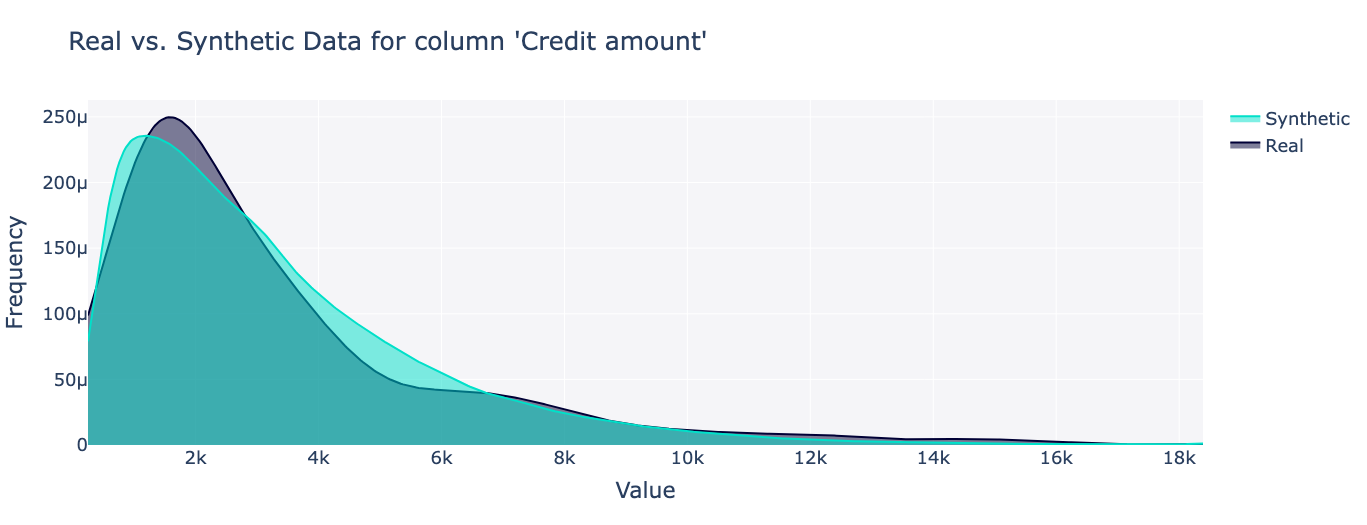

In [ ]:
fig = get_column_plot(
    real_data=german_credit_df,
    synthetic_data=german_synthetic_data,
    column_name='Risk',
    metadata=german_credit_metadata
)

fig.show()

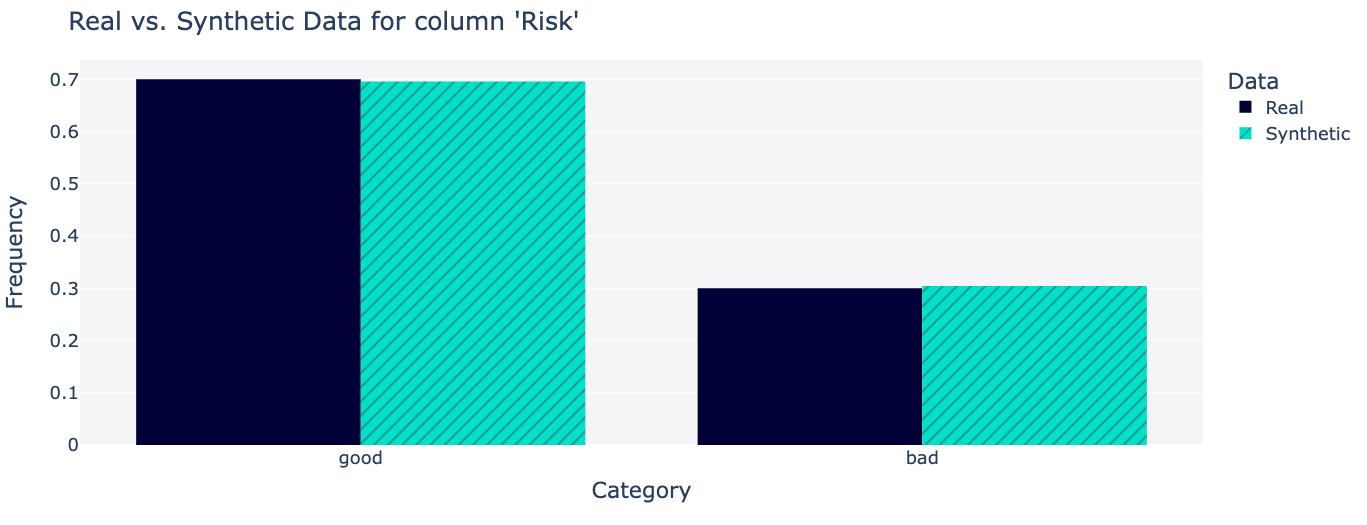

Сравнение синтетических данных и исходных данных полученных для *loans_df*

In [ ]:
fig = get_column_plot(
    real_data=loans_df,
    synthetic_data=loans_synthetic_data,
    column_name='total_credit_limit',
    metadata=loans_metadata
)

fig.show()

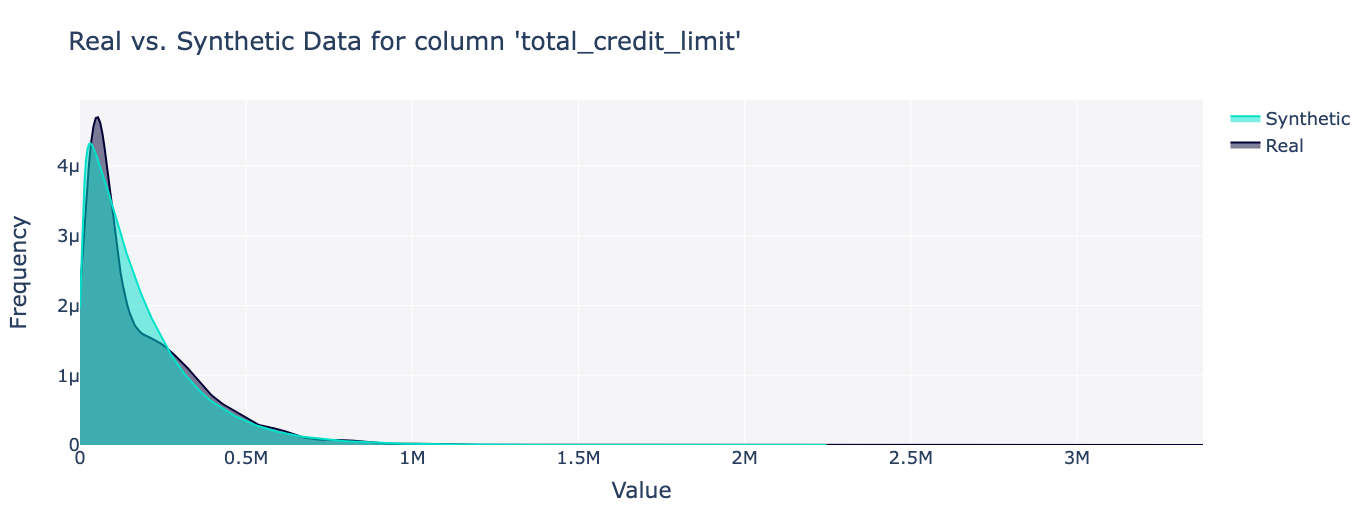

In [ ]:
fig = get_column_plot(
    real_data=loans_df,
    synthetic_data=loans_synthetic_data,
    column_name='application_type',
    metadata=loans_metadata
)

fig.show()

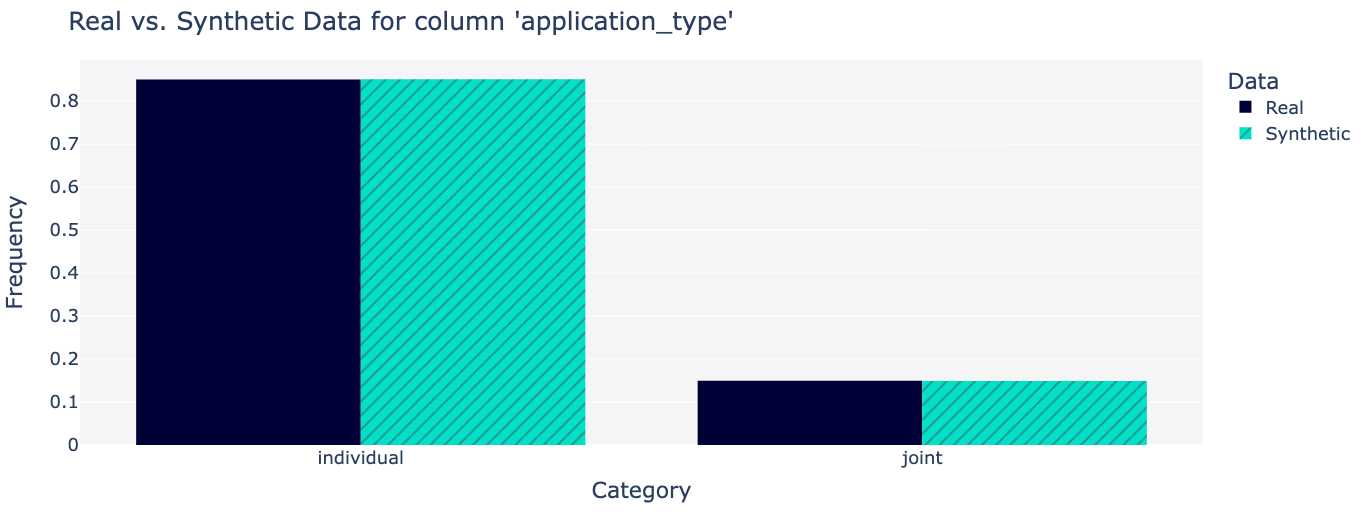